In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
customer_data_df = pd.read_csv('CustomerData.csv', delimiter=';')
customer_service_df = pd.read_csv('CustomerService.csv', delimiter=';')
transaction_df = pd.read_csv('Transaction.csv', delimiter=';')

In [23]:
customer_data_df.head()

# customer_data_df["LoginFrequency"].unique()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage,Churn_status
0,1,62,M,Single,Low,34,Mobile App,0
1,2,65,M,Married,Low,5,Website,1
2,3,18,M,Single,Low,3,Website,0
3,4,21,M,Widowed,Low,2,Website,0
4,5,21,M,Divorced,Medium,41,Website,0


CustomerData DF EDA

Total Churn

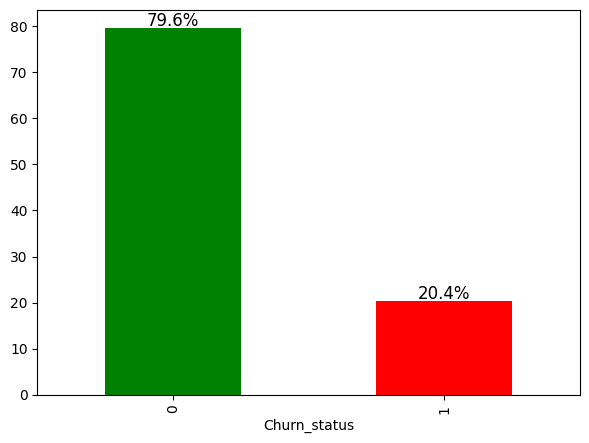

In [24]:
churn = customer_data_df[["CustomerID", "Churn_status"]]

churn_percentage = churn["Churn_status"].value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
ax = churn_percentage.plot(kind="bar", color=["green", "red"])

for i,v in enumerate(churn_percentage):
    ax.text(i,v+0.5 ,f"{v:.1f}%",ha="center",fontsize=12)
plt.show()



Customer who churn's still lower than customer who retent

Comparison Churn with Age , Income and ServiceUsage

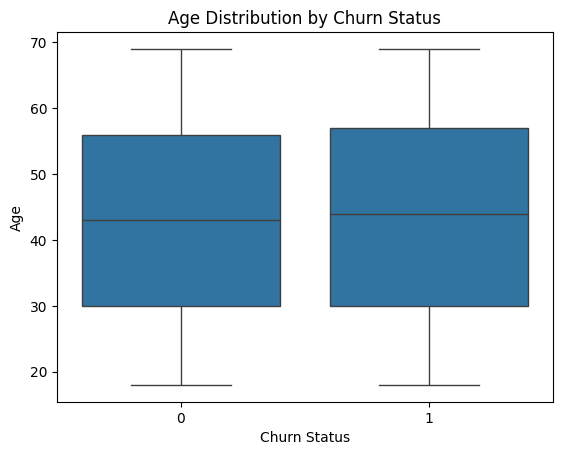

In [25]:
sns.boxplot(x="Churn_status", y="Age", data=customer_data_df)
plt.title("Age Distribution by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Age")
plt.show()

there is not significant difference with age as variable to affect churn

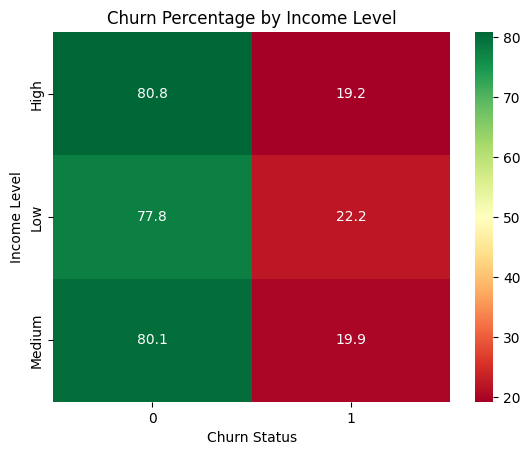

In [26]:
cross = pd.crosstab(customer_data_df["IncomeLevel"], customer_data_df["Churn_status"], normalize='index') * 100
sns.heatmap(cross, annot=True, fmt=".1f", cmap="RdYlGn")
plt.title("Churn Percentage by Income Level")
plt.ylabel("Income Level")
plt.xlabel("Churn Status")
plt.show()

there is not significant difference with IncomeLevel as variable to affect churn

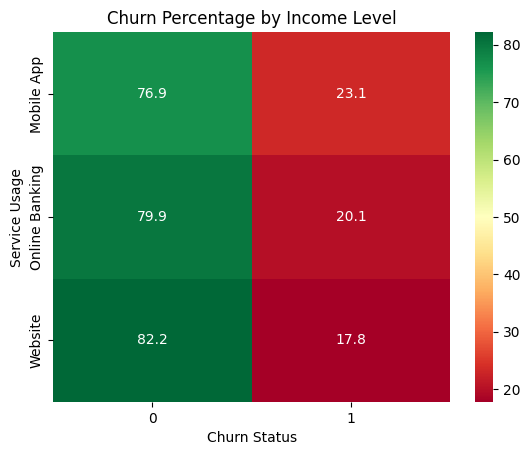

In [27]:
cross = pd.crosstab(customer_data_df["ServiceUsage"], customer_data_df["Churn_status"], normalize='index') * 100
sns.heatmap(cross, annot=True, fmt=".1f", cmap="RdYlGn")
plt.title("Churn Percentage by Income Level")
plt.ylabel("Service Usage")
plt.xlabel("Churn Status")
plt.show()

there is not significant difference with ServiceUsageq as variable to affect churn

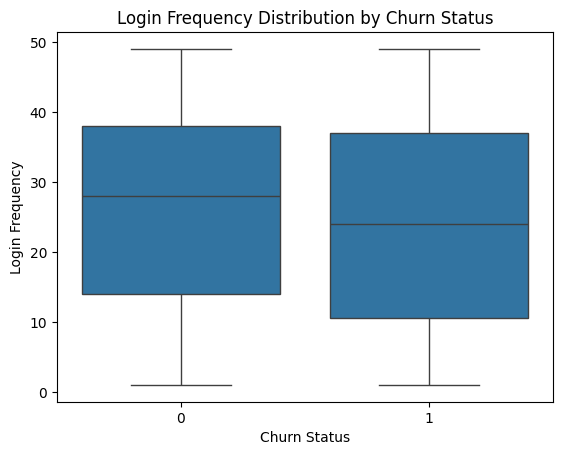

In [28]:
sns.boxplot(x="Churn_status", y="LoginFrequency", data=customer_data_df)
plt.title("Login Frequency Distribution by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Login Frequency")
plt.show()

Customer Service EDA

In [29]:
customer_service_df.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31 00:00:00,Inquiry,Resolved
1,2,3329,2022-03-17 00:00:00,Inquiry,Resolved
2,3,9976,2022-08-24 00:00:00,Inquiry,Resolved
3,4,7354,2022-11-18 00:00:00,Inquiry,Resolved
4,4,5393,2022-07-03 00:00:00,Inquiry,Unresolved


In [30]:
customer_service_df["InteractionType"].unique()

array(['Inquiry', 'Feedback', 'Complaint'], dtype=object)

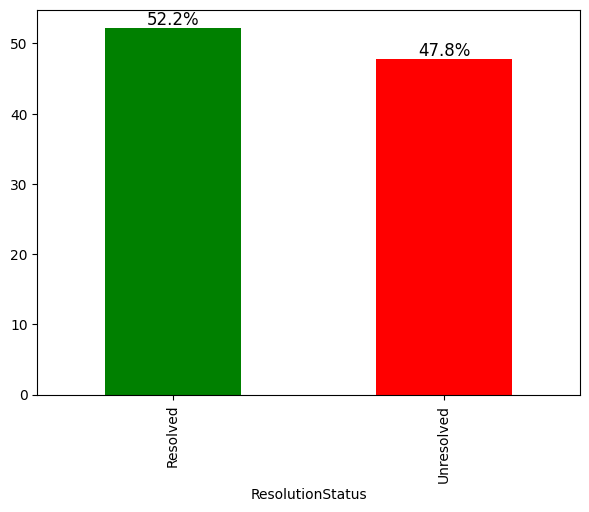

In [31]:
resolution = customer_service_df['ResolutionStatus']
resolution_percentage = resolution.value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
ax = resolution_percentage.plot(kind="bar", color=["green", "red"])

for i,v in enumerate(resolution_percentage):
    ax.text(i,v+0.5 ,f"{v:.1f}%",ha="center",fontsize=12)
plt.show()

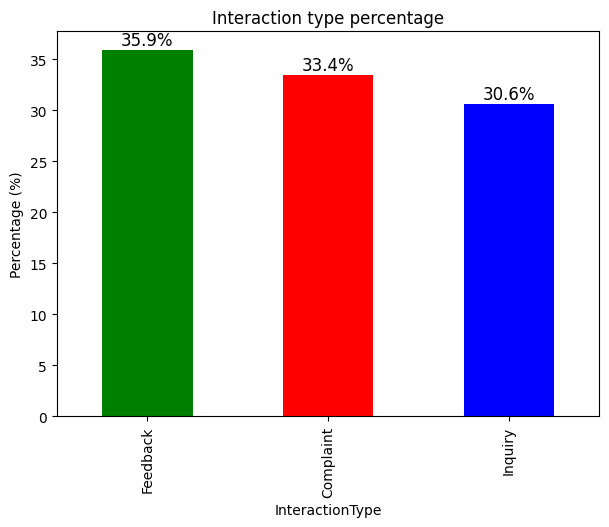

In [32]:
interaction = customer_service_df['InteractionType']
interaction_percentage = interaction.value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
ax = interaction_percentage.plot(kind="bar", color=["green", "red", "blue"])

for i, v in enumerate(interaction_percentage):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=12)

plt.ylabel('Percentage (%)')
plt.title('Interaction type percentage')
plt.show()

Transaction EDA

In [33]:
transaction_df.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27 00:00:00,"416,5",Electronics
1,2,7250,2022-08-08 00:00:00,"54,96",Clothing
2,2,9660,2022-07-25 00:00:00,"197,5",Electronics
3,2,2998,2022-01-25 00:00:00,"101,31",Furniture
4,2,1228,2022-07-24 00:00:00,"397,37",Clothing


In [34]:
transaction_df['AmountSpent'] = transaction_df['AmountSpent'].str.replace(',', '.', regex=False)
transaction_df['AmountSpent'] = transaction_df['AmountSpent'].astype(float)

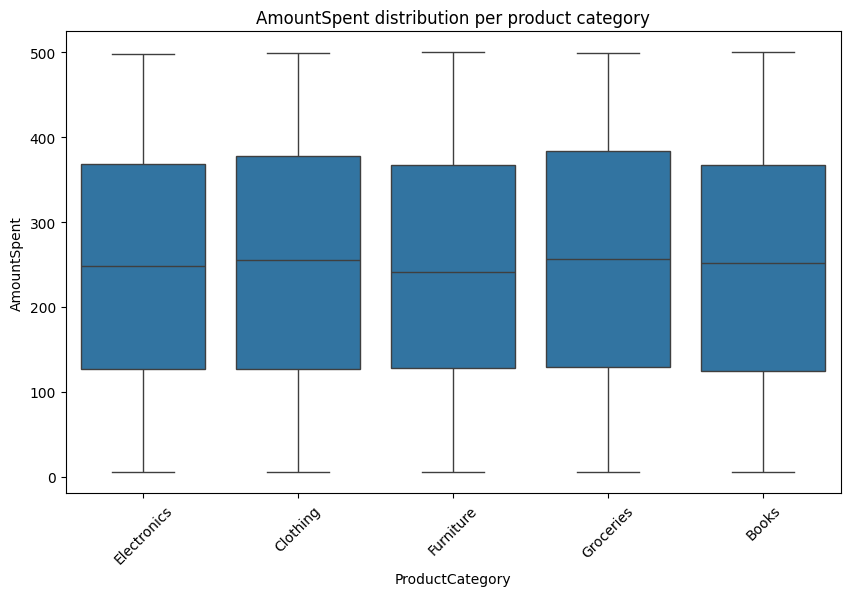

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ProductCategory", y="AmountSpent", data=transaction_df)
plt.title("AmountSpent distribution per product category")
plt.xticks(rotation=45)
plt.show()

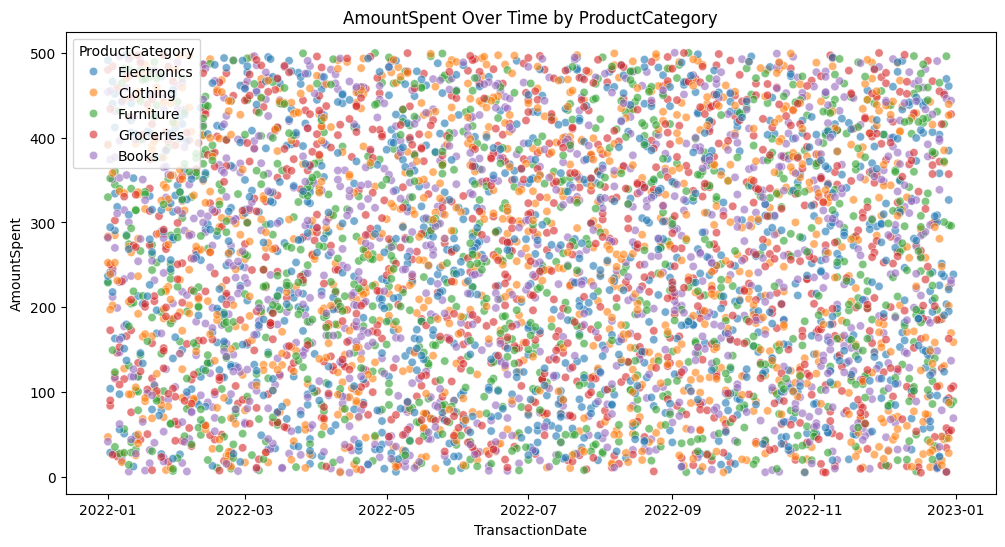

In [36]:
transaction_df["TransactionDate"] = pd.to_datetime(transaction_df["TransactionDate"])

plt.figure(figsize=(12,6))
sns.scatterplot(x="TransactionDate", y="AmountSpent", hue="ProductCategory", data=transaction_df, alpha=0.6)
plt.title("AmountSpent Over Time by ProductCategory")
plt.show()

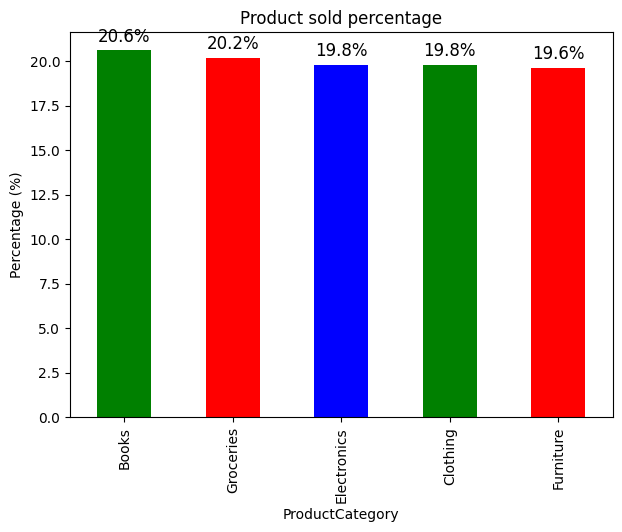

In [37]:
product_sold = transaction_df["ProductCategory"]
product_sold_percentage = product_sold.value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
ax = product_sold_percentage.plot(kind="bar", color=["green", "red", "blue"])

for i, v in enumerate(product_sold_percentage):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=12)

plt.ylabel('Percentage (%)')
plt.title('Product sold percentage')
plt.show()

FEATURE ENGINEERING AND AGGREGATE

Customer service aggregate

In [38]:
customer_service_df.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31 00:00:00,Inquiry,Resolved
1,2,3329,2022-03-17 00:00:00,Inquiry,Resolved
2,3,9976,2022-08-24 00:00:00,Inquiry,Resolved
3,4,7354,2022-11-18 00:00:00,Inquiry,Resolved
4,4,5393,2022-07-03 00:00:00,Inquiry,Unresolved


In [57]:
today = pd.Timestamp("2023-01-01")

agg_service = customer_service_df.groupby('CustomerID').agg(
    total_interactions=('InteractionID', 'count'),
    unresolved_count=('ResolutionStatus', lambda x: (x == 'Unresolved').sum()),
    solved_count=('ResolutionStatus', lambda x: (x == 'Resolved').sum()),
    first_interaction_cs=('InteractionDate', 'min'),
    last_interaction_cs=('InteractionDate', 'max')
).reset_index()

agg_service[['first_interaction_cs', 'last_interaction_cs']] = agg_service[['first_interaction_cs', 'last_interaction_cs']].apply(pd.to_datetime)
agg_service['interaction_duration_days_cs'] = (agg_service['last_interaction_cs'] - agg_service['first_interaction_cs']).dt.days
agg_service[['days_since_first_cs', 'days_since_last_cs']] = (today - agg_service[['first_interaction_cs', 'last_interaction_cs']]).apply(lambda x: x.dt.days)
agg_service[['days_since_first_cs', 'days_since_last_cs']] = agg_service[['days_since_first_cs', 'days_since_last_cs']].fillna(-1)
agg_service.drop(columns=['first_interaction_cs', 'last_interaction_cs'], inplace=True)

interaction_type_count = customer_service_df.pivot_table(
    index='CustomerID',
    columns='InteractionType',
    values='InteractionID',
    aggfunc='count',
    fill_value=0
).reset_index()

agg_service = agg_service.merge(interaction_type_count, on='CustomerID', how='left')
agg_service.head()

,CustomerID,total_interactions,unresolved_count,solved_count,interaction_duration_days_cs,days_since_first_cs,days_since_last_cs,Complaint,Feedback,Inquiry
0,1,1,0,1,0,276,276,0,0,1
1,2,1,0,1,0,290,290,0,0,1
2,3,1,0,1,0,130,130,0,0,1
3,4,2,1,1,138,182,44,0,0,2
4,6,1,0,1,0,241,241,0,1,0


Transaction aggregate

In [40]:
transaction_df.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [ ]:
transaction_df['AmountSpent'] = transaction_df['AmountSpent'].astype(float)

today = pd.Timestamp("2023-01-01")

agg_transaction = transaction_df.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_amount=('AmountSpent', 'sum'),
    first_transaction_tx=('TransactionDate', 'min'),
    last_transaction_tx=('TransactionDate', 'max')
).reset_index()

agg_transaction[['first_transaction_tx', 'last_transaction_tx']] = agg_transaction[['first_transaction_tx', 'last_transaction_tx']].apply(pd.to_datetime)
agg_transaction['transaction_duration_days_tx'] = (agg_transaction['last_transaction_tx'] - agg_transaction['first_transaction_tx']).dt.days
agg_transaction[['days_since_first_tx', 'days_since_last_tx']] = (today - agg_transaction[['first_transaction_tx', 'last_transaction_tx']]).apply(lambda x: x.dt.days)
agg_transaction[['days_since_first_tx', 'days_since_last_tx']] = agg_transaction[['days_since_first_tx', 'days_since_last_tx']].fillna(-1)
agg_transaction.drop(columns=['first_transaction_tx', 'last_transaction_tx'], inplace=True)

product_counts = (
    transaction_df.pivot_table(index='CustomerID',
                                columns='ProductCategory',
                                values='TransactionID',
                                aggfunc='count',
                                fill_value=0)
    .reset_index()
)

agg_transaction = agg_transaction.merge(product_counts, on='CustomerID', how='left')
agg_transaction.head()



np.True_

In [71]:
final_df = customer_data_df.merge(agg_service, on="CustomerID", how="left") \
                           .merge(agg_transaction, on="CustomerID",how="left")

cols_to_fill = [
    'total_interactions', 'unresolved_count', 'solved_count', 'interaction_duration_days_cs',
    'total_transactions', 'total_amount', 'transaction_duration_days_tx',
    'Books', 'Clothing', 'Electronics', 'Furniture', 'Groceries'
]

for col in cols_to_fill:
    final_df[col] = final_df[col].fillna(0)


final_df.head()

# final_df.columns


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage,Churn_status,total_interactions,unresolved_count,...,total_transactions,total_amount,transaction_duration_days_tx,days_since_first_tx,days_since_last_tx,Books,Clothing,Electronics,Furniture,Groceries
0,1,62,M,Single,Low,34,Mobile App,0,1.0,0.0,...,1,416.50,0,280,280,0,0,1,0,0
1,2,65,M,Married,Low,5,Website,1,1.0,0.0,...,7,1547.42,314,357,43,0,2,3,1,1
2,3,18,M,Single,Low,3,Website,0,1.0,0.0,...,6,1702.98,239,324,85,1,1,0,2,2
3,4,21,M,Widowed,Low,2,Website,0,2.0,1.0,...,5,917.29,219,224,5,0,1,2,1,1
4,5,21,M,Divorced,Medium,41,Website,0,0.0,0.0,...,8,2001.49,303,314,11,0,0,3,2,3


One hot encoding for categorical values

In [72]:
final_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage,Churn_status,total_interactions,unresolved_count,...,total_transactions,total_amount,transaction_duration_days_tx,days_since_first_tx,days_since_last_tx,Books,Clothing,Electronics,Furniture,Groceries
0,1,62,M,Single,Low,34,Mobile App,0,1.0,0.0,...,1,416.50,0,280,280,0,0,1,0,0
1,2,65,M,Married,Low,5,Website,1,1.0,0.0,...,7,1547.42,314,357,43,0,2,3,1,1
2,3,18,M,Single,Low,3,Website,0,1.0,0.0,...,6,1702.98,239,324,85,1,1,0,2,2
3,4,21,M,Widowed,Low,2,Website,0,2.0,1.0,...,5,917.29,219,224,5,0,1,2,1,1
4,5,21,M,Divorced,Medium,41,Website,0,0.0,0.0,...,8,2001.49,303,314,11,0,0,3,2,3


In [58]:
print(final_df["first_interaction_cs"].unique())

<DatetimeArray>
['2022-03-31 00:00:00', '2022-03-17 00:00:00', '2022-08-24 00:00:00',
 '2022-07-03 00:00:00',                 'NaT', '2022-05-05 00:00:00',
 '2022-04-29 00:00:00', '2022-08-15 00:00:00', '2022-01-26 00:00:00',
 '2022-01-12 00:00:00',
 ...
 '2022-04-20 00:00:00', '2022-11-29 00:00:00', '2022-10-08 00:00:00',
 '2022-07-05 00:00:00', '2022-09-28 00:00:00', '2022-06-17 00:00:00',
 '2022-11-11 00:00:00', '2022-06-22 00:00:00', '2022-10-10 00:00:00',
 '2022-09-29 00:00:00']
Length: 300, dtype: datetime64[ns]
